In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [2]:
import mistree as mist

In [3]:
import statsmodels.api as sm

/home/AD/tsainbur/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from childes_mi.information_theory import mutual_information as mi
# distances of MI to sample at
distances = np.unique(np.logspace(0, 4, 100, base=10).astype('int'))

In [23]:
N=1000000
NDIST=100 
ChangeProb1 = 0.9999 

In [24]:
ChangeProb = ChangeProb1**np.arange(N) 

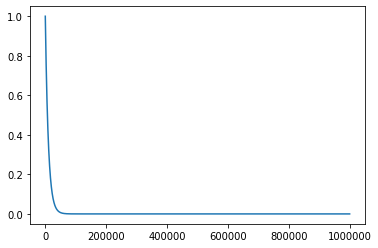

In [25]:
plt.plot(ChangeProb)

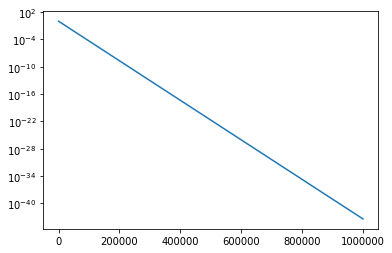

In [26]:
plt.semilogy(ChangeProb)

In [27]:
RandomValues = np.random.uniform(size = N) 

In [28]:
RandomValues.shape

(1000000,)

In [29]:
Change = RandomValues < ChangeProb 

In [30]:
RandomValues

array([0.29641966, 0.90217164, 0.17909218, ..., 0.93826488, 0.95132406,
       0.87189515])

In [31]:
Output = np.repeat(True, N)
for n in tqdm(np.arange(1, N-1)):
    if Change[n]:
        Output[n] = not Output[n-1]
    else:
        Output[n] = Output[n-1]

(array([    0,     1,     2, ..., 73571, 75154, 79939]),)

In [68]:
repeat_lengths = np.diff(np.where(Output[1:] !=  Output[:-1]))[0]

In [69]:
Output[:3]

array([ True, False,  True])

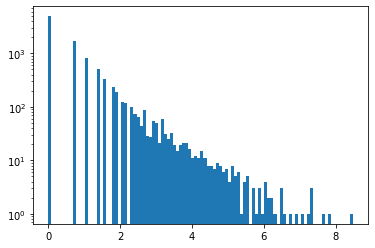

In [72]:
fig, ax = plt.subplots()
#ax.hist(np.log(1e-1+n_repeats), bins=100)
ax.hist(np.log(repeat_lengths), bins=100)
ax.set_yscale("log")

In [41]:
Output

array([ True, False,  True, ...,  True,  True,  True])

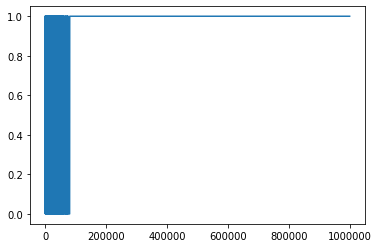

In [74]:
plt.plot(Output)

In [32]:
distances = np.arange(1,1000)

In [33]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [Output], distances=distances, n_jobs=-1
)
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    3.9s


[Parallel(n_jobs=-1)]: Done 999 out of 999 | elapsed:    5.2s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:    5.7s


[Parallel(n_jobs=-1)]: Done 999 out of 999 | elapsed:    6.9s finished


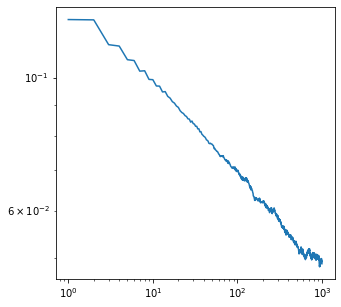

In [34]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI-row.shuff_MI

ax.plot(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

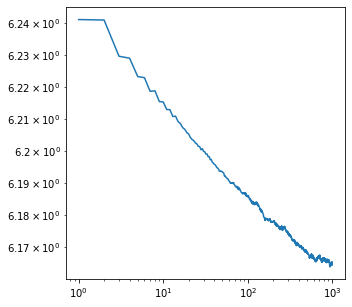

In [35]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI#-row.shuff_MI

ax.plot(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

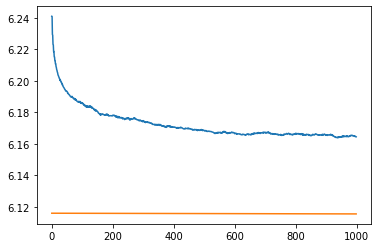

In [56]:
plt.plot(row.MI)
plt.plot(row.shuff_MI)

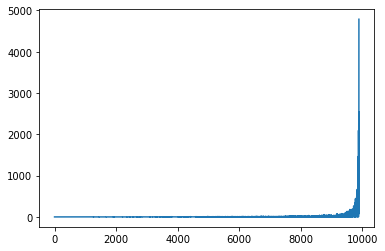

In [79]:
plt.plot(repeat_lengths)

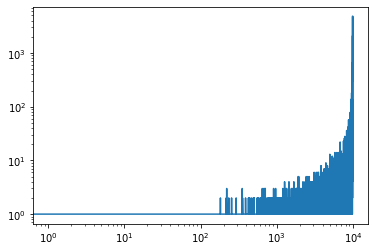

In [77]:
plt.loglog(repeat_lengths)

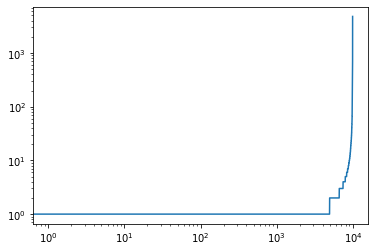

In [78]:
plt.loglog(np.sort(repeat_lengths))

In [80]:
!pip install colorednoise


  Created wheel for colorednoise: filename=colorednoise-1.1.1-cp37-none-any.whl size=3958 sha256=f685459d0ca8042f422ee5c24ef7b8a1f9ac5b9cece3d99807bdedd8bc01425b
  Stored in directory: /home/AD/tsainbur/.cache/pip/wheels/84/be/f3/3e7e1c80ebab3f6f0dbd3e34e787b902d2280d66706485fef4
Successfully built colorednoise


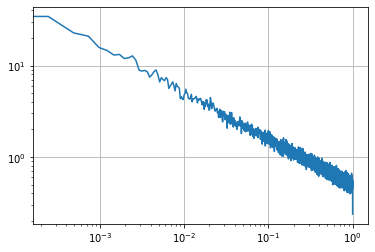

In [210]:
import colorednoise as cn
beta = 0.5 # the exponent
samples = 2**20 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt
s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()

In [211]:
samples

1048576

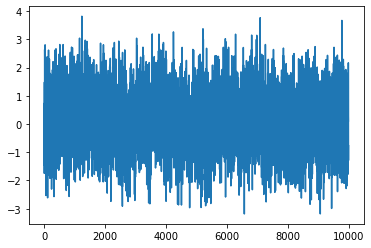

In [212]:
plt.plot(y[:10000])

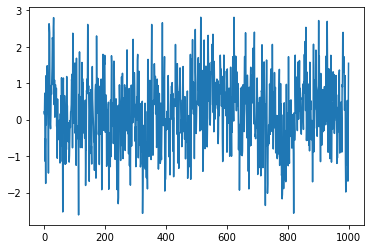

In [213]:
plt.plot(y[:1000])

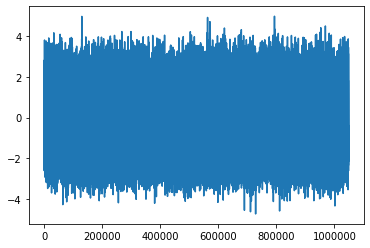

In [214]:
plt.plot(y)

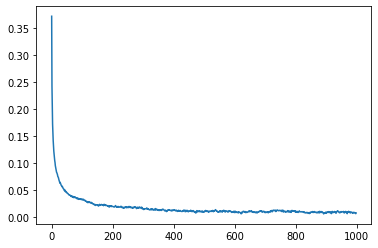

In [215]:
plt.plot(autocorrelate(y,  range_ = range(1,1000)))

In [218]:
range_ = np.arange(1,1000)

In [219]:
autocorr = autocorrelate(y,  range_ = range_)

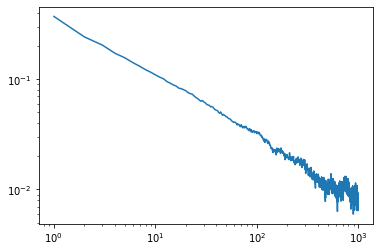

In [220]:
plt.loglog(range_, autocorr)

In [217]:
from statsmodels.tsa.stattools import acf

In [198]:
# distance as a function of step size
autocorrelation = acf(y, nlags = 1000)

In [199]:
autocorrelation

array([1.        , 0.37082699, 0.23926567, ..., 0.0035956 , 0.00449792,
       0.00294026])

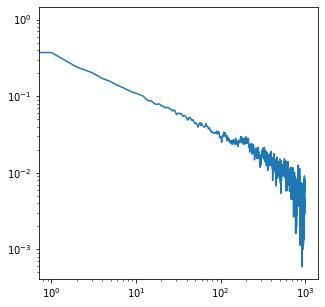

In [200]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(autocorrelation)
ax.set_yscale('log')
ax.set_xscale('log')

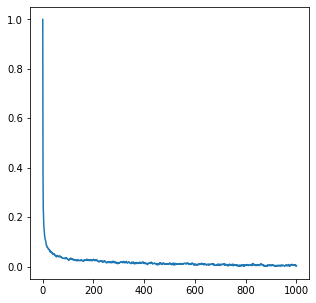

In [201]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(autocorrelation)

In [202]:
np.max(y), np.min(y)

(4.788838329842568, -4.52151392549021)

In [203]:
autocorr = np.correlate(y, y, mode='full')[int(len(y)/2):]

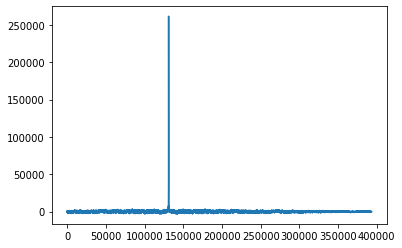

In [204]:
plt.plot(autocorr)

In [205]:
def autocorrelate(y, range_ = range(1,100), parallel=False):
    return [np.corrcoef(y[i:], y[:-i])[0][1] for i in tqdm(range_)]

In [206]:
range_ = range(1,100)

In [207]:
autocorr = autocorrelate(y)

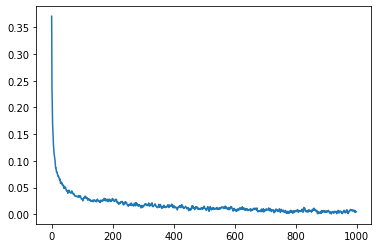

In [208]:
plt.plot(autocorrelate(y,  range_ = range(1,1000)))

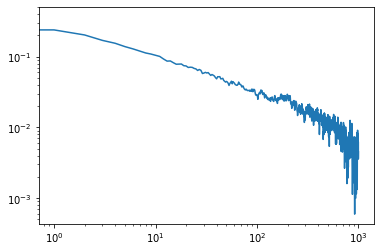

In [209]:
plt.loglog(autocorrelate(y,  range_ = range(1,1000)))